# **Titanic Survival Prediction End to End ML Pipeline**

## Introduction
**Altaf Uddin**

*11/6/2023*

Practicing Machine Learning on the topic.

This notebook contains:

1. **Introduction**
    1. Import Libraries
    2. Load data
    3. Run Statistical summeries
    4. Figure out missing value columns 
2. **Visualization**
    1. Corelation with target variable
3. **Missing value imputation**
    1. train data Missing columns- Embarked,Age,Cabin
    2. test data Missing columns- Age and Fare
4. **Feature Engeering**
    1. Calculate total family size
    2. Get title from name
    3. Find out which deck passenger belonged to
    4. Dealing with Categorical Variables
         * Label encoding
    5. Feature Scaling
5. **Prediction**
    1. Split into training & test sets
    2. Build the model
    3. Feature importance
    4. Predictions
    5. Ensemble : Majority voting

# import Libraries

In [1]:
import pandas as pd #For reading csv file
import numpy as np # For numerical computation

# Load train and test data

In [2]:
tt_train = pd.read_csv("/kaggle/input/titanic/train.csv") #loading training data
tt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tt_test = pd.read_csv("/kaggle/input/titanic/test.csv") #loading test data
tt_test.head().T # .T displays results in columns

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [4]:
tt_train.shape

(891, 12)

In [5]:
#Describe gives statistical information about numerical columns in the dataset

tt_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc

tt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Finding Null values

null_columns = tt_train.columns[tt_train.isnull().any()]
tt_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
tt_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**As some columns have null values they needs to be filled**

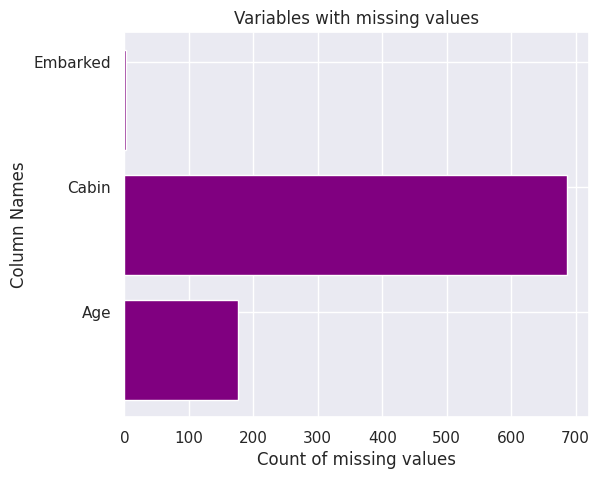

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of columns with missing values (replace this with your actual list)
null_columns = ['Age', 'Cabin', 'Embarked']

sns.set()

labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(tt_train[col].isnull().sum())  # Assuming 'titanic' is your DataFrame

ind = np.arange(len(labels))
width = 0.6

fig, ax = plt.subplots(figsize=(6, 5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind + (width / 2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

plt.show()

# Visulization

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

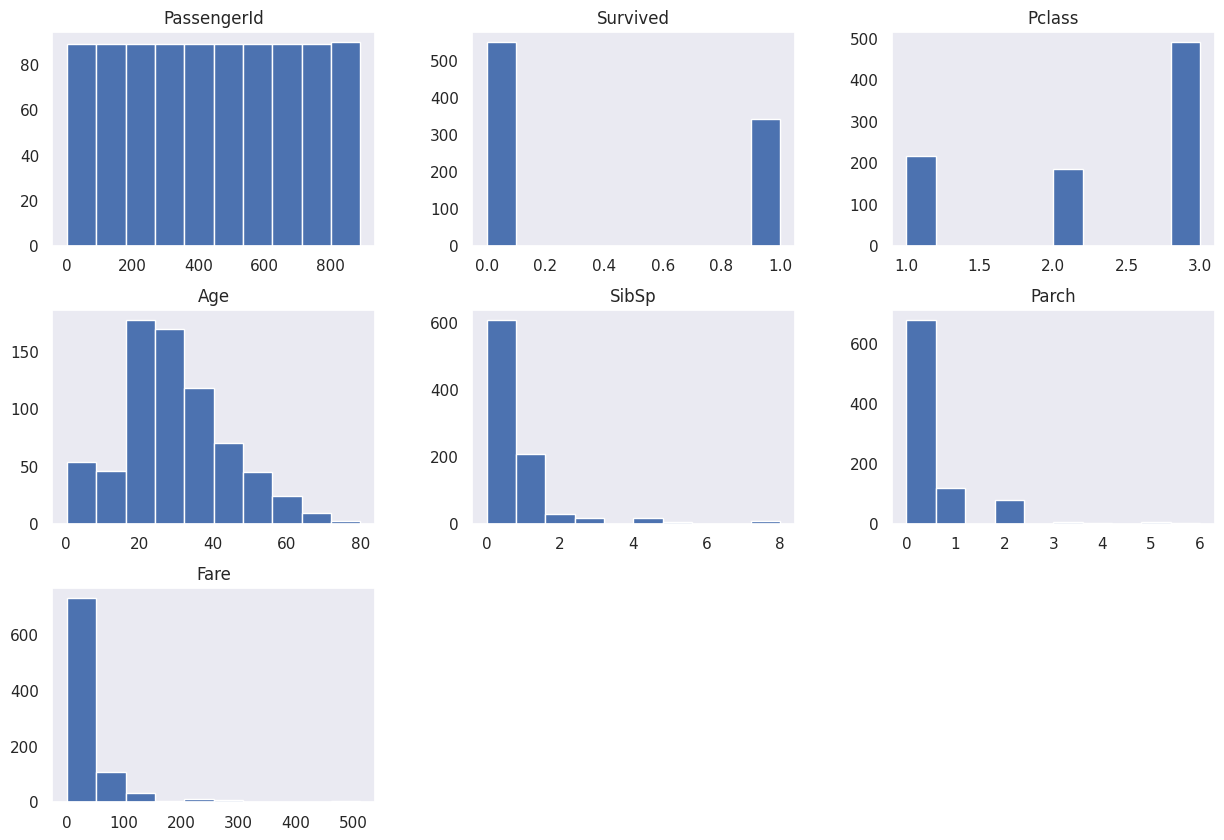

In [10]:
tt_train.hist(bins=10, figsize=(15, 10),grid=False)

**We can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


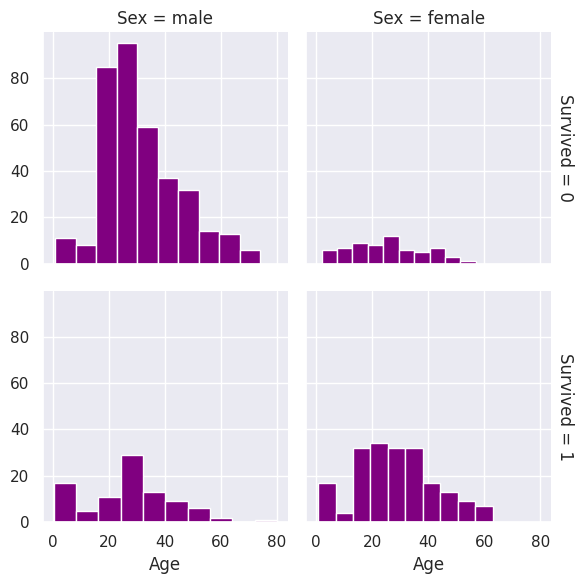

In [11]:
g = sns.FacetGrid(tt_train, col='Sex', row='Survived', margin_titles=True)
g.map(plt.hist, "Age", color='purple')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


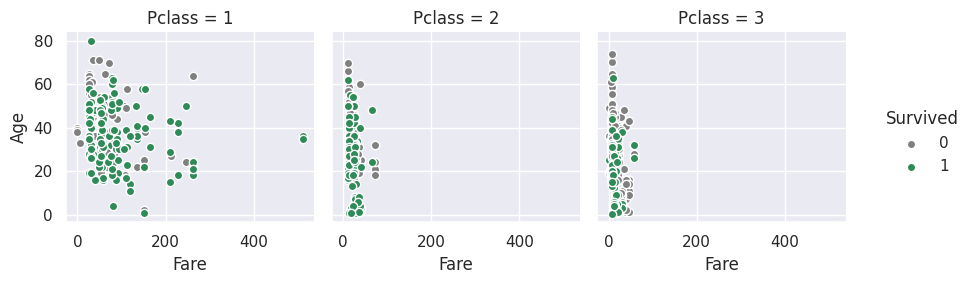

In [12]:
g = sns.FacetGrid(tt_train, hue='Survived', col='Pclass', margin_titles=True, palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Survival by Gender, Age and Fare')

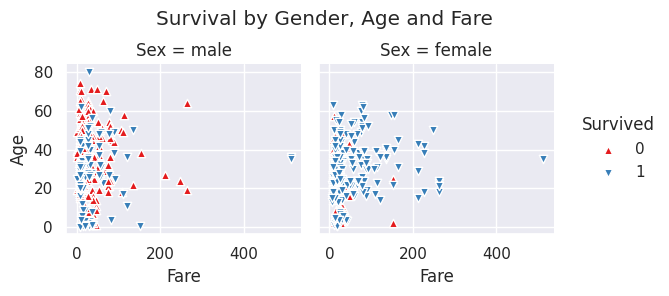

In [13]:
g = sns.FacetGrid(tt_train, hue='Survived', col='Sex', margin_titles=True, palette='Set1', hue_kws=dict(marker=['^','v']))
g.map(plt.scatter, 'Fare','Age', edgecolor='w').add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age and Fare')

Text(0.5, 1.0, 'Passenger per boarding location')

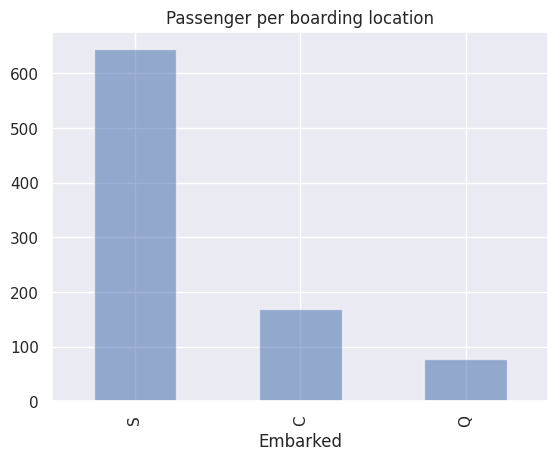

In [14]:
tt_train.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title('Passenger per boarding location')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


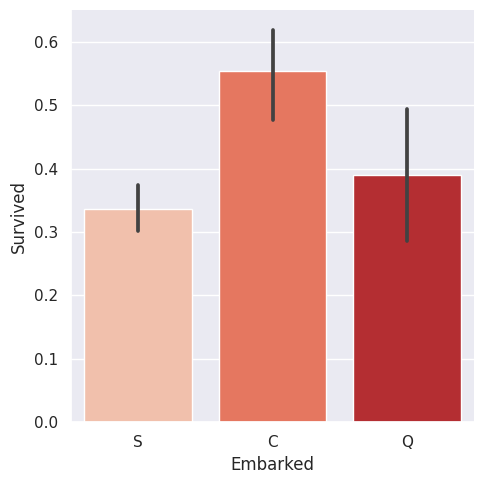

In [15]:
sns.catplot(x='Embarked', y='Survived', data=tt_train, kind='bar', palette='Reds')

plt.show()

/tmp/ipykernel_20/2400869052.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Sex", y="Survived", col="Pclass",
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


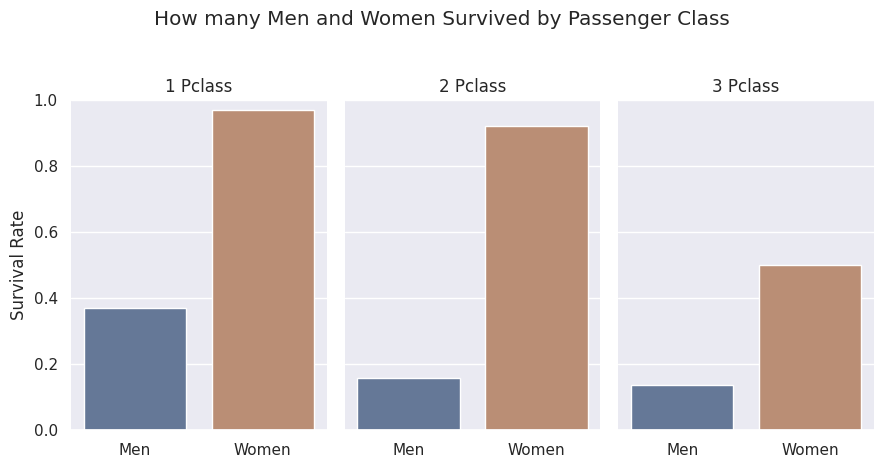

In [16]:
# Set the font scale for Seaborn plots
sns.set(font_scale=1)

g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                data=tt_train, saturation=.5,
                kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')

plt.show()

Text(0.5, 1.0, 'Survival by Age')

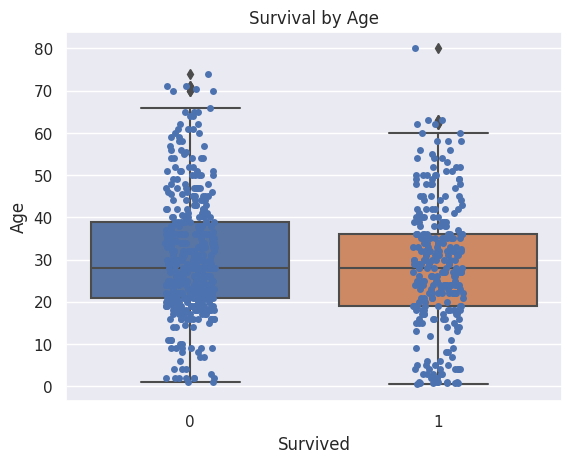

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='Survived', y='Age', data=tt_train)
ax = sns.stripplot(x='Survived', y='Age', data=tt_train, jitter=True, edgecolor='grey')
plt.title('Survival by Age')

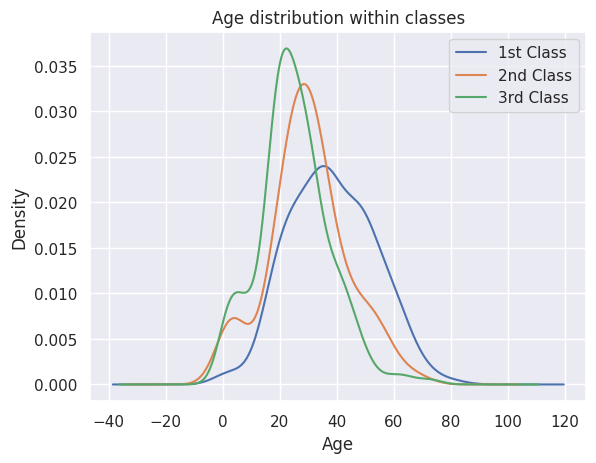

In [18]:
tt_train.Age[tt_train.Pclass == 1].plot(kind='kde')
tt_train.Age[tt_train.Pclass == 2].plot(kind='kde')
tt_train.Age[tt_train.Pclass == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')

plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

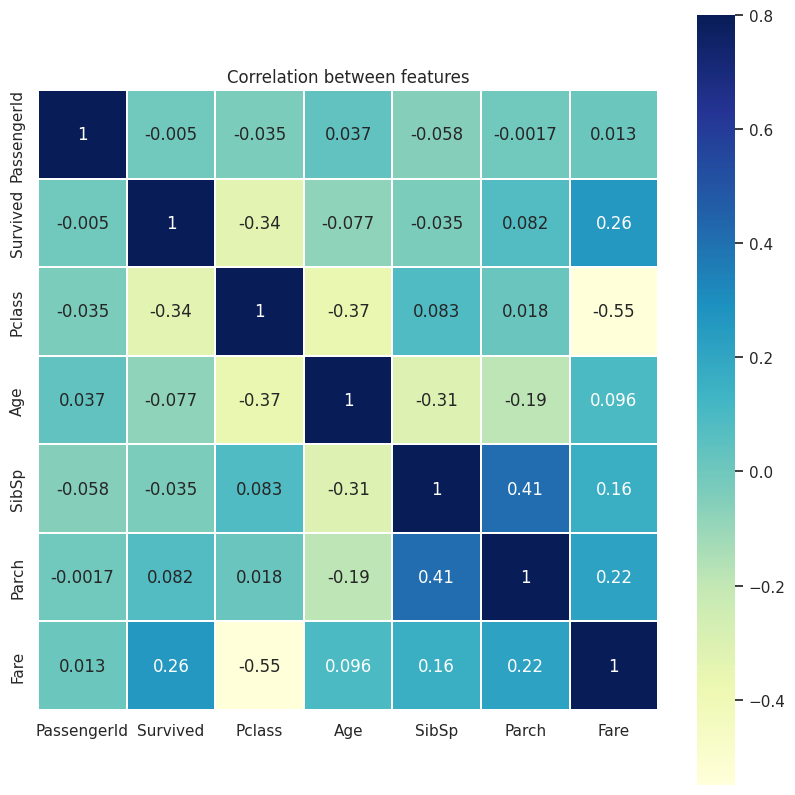

In [19]:
# Select numeric columns
numeric_columns = tt_train.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8, linewidth=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='white')
plt.title('Correlation between features')
plt.show()

In [20]:
#correlation of features with target variable
# Select numeric columns
numeric_columns = tt_train.select_dtypes(include=[float, int])

# Calculate the correlation matrix
numeric_columns.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


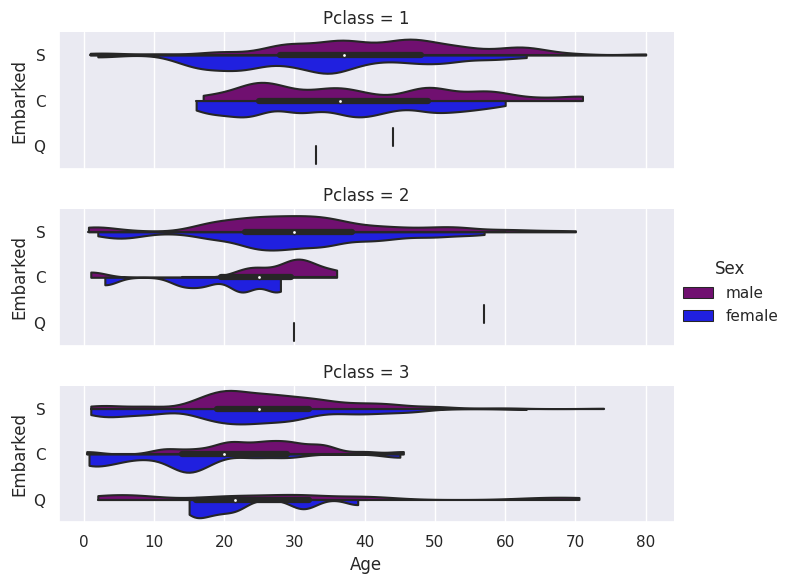

In [21]:
# Filter rows with non-null 'Embarked' values
filtered_data = tt_train[tt_train['Embarked'].notnull()]

# Create a categorical plot using catplot
g = sns.catplot(x='Age', y='Embarked', hue='Sex', row='Pclass', data=filtered_data, orient='h', height=2, aspect=3.5, palette={'male':'purple', 'female':'blue'}, kind='violin', split=True, cut=0, bw=.2)

plt.show()

## Missing Value Imputation

**Its important to fill missing values, because some machine learning algorithms can't accept them eg SVM.**

But filling missing values with mean/median/mode is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

**Embarked Column**

In [22]:
tt_train[tt_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**PassengerId 62 and 830** have missing embarked values

Both have **Passenger class 1** and **fare $80.**

Lets plot a graph to visualize and try to guess from where they embarked

<Axes: xlabel='Embarked', ylabel='Fare'>

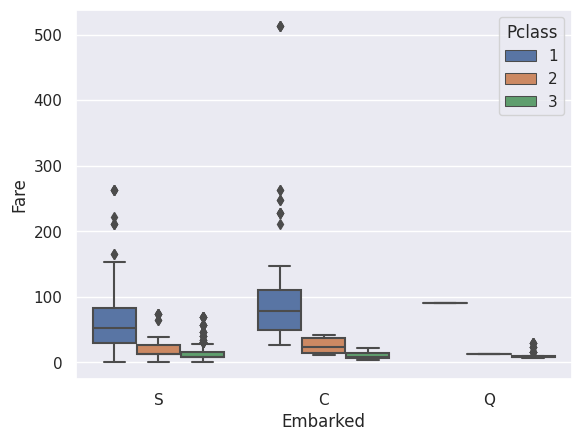

In [23]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=tt_train)

In [24]:
tt_train['Embarked'] = tt_train['Embarked'].fillna('C')

In [25]:
tt_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Fare Column**

In [26]:
tt_test[tt_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:
# Replacing missing values in fare by median of all fares

def fill_missing_fare(df):
    median_fare = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    
    df['Fare'] = df['Fare'].fillna(median_fare)
    return df

tt_test = fill_missing_fare(tt_test)

# Feature Engineering